Use this file to record notes from reading papers


# Andrew Granville - Bounded Gaps Between Primes

Twin Prime Conjecture - There exisists an inifinite number of numbers $n \in \mathbb{N}$ s.t. $n$ and $n+2$ are both prime 

Generalized Twin Prime Conjecture - for any integer $2k$, there exists infinite prime pairs $p$,$q=p+2k$

de Polignac Number - any integer $h$ s.t $p$ and $p+h$ are both prime for infinitely many primes $p$ 

Prime Number Theorem - The probability that a random integer not greater than $N$ (sufficiently large) is $\frac{1}{\log(N)}$ s.t. the distance between primes up to $N$ is about $\log(N)$ 

Von Mangoldt Function - neither multiplicative or additive, not sure how this is useful yet but could be cool, defined as piecewise function 
$$\Lambda(q) = \left\{ \begin{array}{ll}
log(p) & \quad q = p^k, k \in \mathbb{Z}, p \in primes
\\0 & \quad otherwise 
\end{array} \right.$$ 


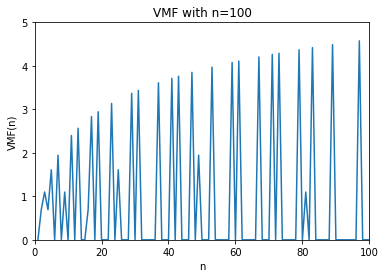

Text(0.5, 1.0, '10^VMF with n=100')

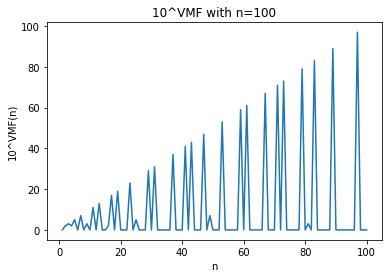

In [69]:
#Von Mangoldt function plot
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#set of numbers to plot
N = np.arange(1,101.0)

#generate primes up to N
def genPrimes(N):
    P = []
    for p in range(2,N):
        prime = True
        for q in range(2,p):
            if p%q == 0:
                prime = False
        if prime:
            P.append(p)
    return P

#check if any prime power up to p^k = N divides a given input
def checkPrimePowers(n,P,N):
    for p in P:
        pOrig = p
        found = False
        while(p<N):
            if n == p:
                found = True
                break
            else:
                p = p*p
        if found:
            return pOrig
    return 0

#send N to VMF form
def VMF(N):
    P = genPrimes(len(N))
    for i in range(len(N)):
        p = checkPrimePowers(N[i],P,len(N))
        if p!=0:
            N[i] = np.log(p)
        else:
            N[i] = 0
    return N
VMF(N)

plt.plot(np.arange(1,101.),N)
plt.axis([0,100,0,5])
plt.xlabel('n')
plt.ylabel('VMF(n)')
plt.title('VMF with n=100')
plt.show()

#plot which prime powers are most frequent 
def VMF_p(N):
    P = genPrimes(len(N))
    for i in range(len(N)):
        p = checkPrimePowers(N[i],P,len(N))
        if p!=0:
            N[i] = p
        else:
            N[i] = 0
    return N
N = np.arange(1,101.)
VMF_p(N)


plt.plot(np.arange(1,101.),N)
plt.xlabel('n')
plt.ylabel('10^VMF(n)')
plt.title('10^VMF with n=100')



Admissible Set of Forms - let $H$ be a set $\{h_1,h_2,\ldots,h_k\}$ s.t. $h_1<h_2<\ldots<h_k$ and let $\nu_p(H)$ be the number of distinct residue classes mod $p$ in a certain set $H$, then $H$ is an admissible set if $$\nu_p(H) < p \quad \forall p \in primes$$ 

$p \in primes$ is an obstruction to a set $H$ if $p|(x+h_1)(x+h_2)\ldots(x+h_k)$ for some $x \in \mathbb{N}$

This means that there is no $p \in primes$ that is an obstruction to $H$ if $H$ is admissible

A consequence of this is that $H$ occupies at most $k$ residue classes all primes $p>k$ are not obstructions to the set $H$

if there are no obstructions to $H$ for all $p \in primes$, then there are at least 2 distinct primes $p,q \in H$ that are at most a distance $h_k-h_1$ apart, smallest value of $h_k-h_1$ so far is 12!!! 

optimistic conjecture - if there exists some $x \in \mathbb{N}$ s.t. $H = \{x+h_1,x+h_2,\ldots,x+h_k\}$ is admissible, then there are infinitly many numbers $n \in \mathbb{N}$ s.t. $H = \{n+h_1,n+h_2,\ldots,n+h_k\}$ is also admissible and contains $k$ distinct primes.  